# 1. Downloading AAPL price data

In [1]:
import yfinance as yf

In [2]:
AAPL = yf.Ticker("AAPL")

In [3]:
AAPL = AAPL.history(period="max")

In [4]:
AAPL

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,37122800,0.0,0.0
2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,28919300,0.0,0.0
2023-12-27 00:00:00-05:00,192.490005,193.500000,191.089996,193.149994,48087700,0.0,0.0


In [5]:
AAPL.index

DatetimeIndex(['1980-12-12 00:00:00-05:00', '1980-12-15 00:00:00-05:00',
               '1980-12-16 00:00:00-05:00', '1980-12-17 00:00:00-05:00',
               '1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               ...
               '2023-12-15 00:00:00-05:00', '2023-12-18 00:00:00-05:00',
               '2023-12-19 00:00:00-05:00', '2023-12-20 00:00:00-05:00',
               '2023-12-21 00:00:00-05:00', '2023-12-22 00:00:00-05:00',
               '2023-12-26 00:00:00-05:00', '2023-12-27 00:00:00-05:00',
               '2023-12-28 00:00:00-05:00', '2023-12-29 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=10853, freq=None)

# 2. Cleaning and visualizing our AAPL stock data

<Axes: xlabel='Date'>

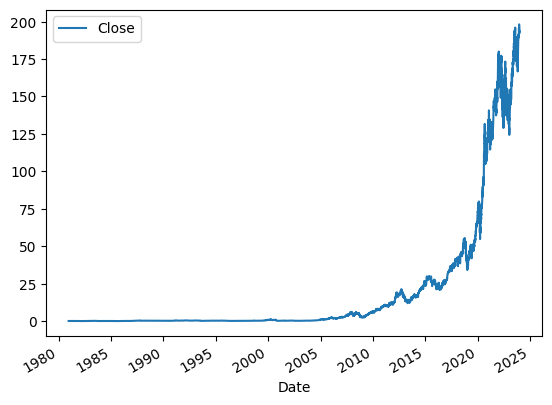

In [6]:
AAPL.plot.line(y="Close", use_index=True)

In [7]:
del AAPL["Dividends"]
del AAPL["Stock Splits"]

# 3. Setting up our target and training a first machine learning model

In [8]:
AAPL["Tomorrow"] = AAPL["Close"].shift(-1)

In [9]:
AAPL

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.094137
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.087228
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.089387
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.091978
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.097591
...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,37122800,193.050003
2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,28919300,193.149994
2023-12-27 00:00:00-05:00,192.490005,193.500000,191.089996,193.149994,48087700,193.580002


In [10]:
AAPL["Target"] = (AAPL["Tomorrow"] > AAPL["Close"]).astype(int)

In [11]:
AAPL

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.094137,0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.087228,0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.089387,1
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.091978,1
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.097591,1
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,37122800,193.050003,0
2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,28919300,193.149994,1
2023-12-27 00:00:00-05:00,192.490005,193.500000,191.089996,193.149994,48087700,193.580002,1


In [12]:
AAPL = AAPL.loc["1990-01-01":].copy()

In [13]:
AAPL

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.249271,0.265181,0.247503,0.263414,183198400,0.265181,1
1990-01-03 00:00:00-05:00,0.268718,0.268718,0.265181,0.265181,207995200,0.266066,1
1990-01-04 00:00:00-05:00,0.270486,0.274021,0.263414,0.266066,221513600,0.266950,1
1990-01-05 00:00:00-05:00,0.266950,0.270485,0.261646,0.266950,123312000,0.268718,1
1990-01-08 00:00:00-05:00,0.265181,0.268718,0.261646,0.268718,101572800,0.266066,0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,37122800,193.050003,0
2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,28919300,193.149994,1
2023-12-27 00:00:00-05:00,192.490005,193.500000,191.089996,193.149994,48087700,193.580002,1


In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = AAPL.iloc[:-100]
test = AAPL.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])


In [16]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [17]:
preds

Date
2023-08-09 00:00:00-04:00    0
2023-08-10 00:00:00-04:00    0
2023-08-11 00:00:00-04:00    0
2023-08-14 00:00:00-04:00    0
2023-08-15 00:00:00-04:00    0
                            ..
2023-12-22 00:00:00-05:00    0
2023-12-26 00:00:00-05:00    0
2023-12-27 00:00:00-05:00    1
2023-12-28 00:00:00-05:00    0
2023-12-29 00:00:00-05:00    1
Length: 100, dtype: int64

In [18]:
precision_score(test["Target"], preds)

0.6666666666666666

<Axes: xlabel='Date'>

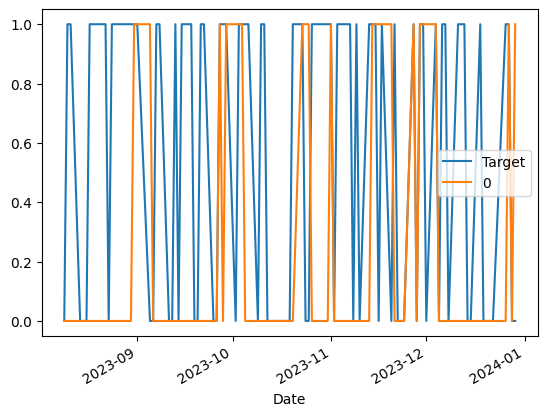

In [19]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

# 4. Building a backtesting system

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i: (i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [22]:
predictions = backtest(AAPL, model, predictors)

In [23]:
precision_score(predictions["Target"], predictions["Predictions"])

0.517792676637442

# 5. Adding additional predictors to our model and improving it

In [24]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = AAPL.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    AAPL[ratio_column] = AAPL["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    AAPL[trend_column] = AAPL.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [25]:
AAPL = AAPL.dropna(subset=AAPL.columns[AAPL.columns != "Tomorrow"])

In [26]:
AAPL

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,0.215842,0.219531,0.213997,0.214919,293664000,0.219531,1,0.993604,1.0,0.978993,1.0,1.007241,22.0,0.694753,111.0,0.637248,462.0
1993-12-15 00:00:00-05:00,0.213997,0.219531,0.213997,0.219531,123883200,0.216764,0,1.010615,1.0,1.014493,2.0,1.025699,23.0,0.711547,111.0,0.651010,462.0
1993-12-16 00:00:00-05:00,0.217686,0.219531,0.213997,0.216764,126369600,0.217686,1,0.993658,1.0,1.005994,2.0,1.010468,22.0,0.704569,110.0,0.642898,461.0
1993-12-17 00:00:00-05:00,0.217686,0.219531,0.214919,0.217686,145152000,0.210307,0,1.002123,1.0,1.001698,3.0,1.011960,23.0,0.709636,110.0,0.645728,461.0
1993-12-20 00:00:00-05:00,0.215842,0.219531,0.208462,0.210307,189033600,0.202928,0,0.982758,1.0,0.974358,2.0,0.975653,22.0,0.687599,110.0,0.623946,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,37122800,193.050003,0,0.997219,0.0,0.991864,1.0,1.053671,34.0,1.131616,140.0,1.389710,526.0
2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,28919300,193.149994,1,0.998578,0.0,0.991933,1.0,1.048578,33.0,1.126722,140.0,1.384569,525.0
2023-12-27 00:00:00-05:00,192.490005,193.500000,191.089996,193.149994,48087700,193.580002,1,1.000259,1.0,0.996327,1.0,1.047261,33.0,1.125523,141.0,1.384091,526.0


In [27]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [28]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [29]:
predictions = backtest(AAPL, model, new_predictors)

In [30]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5324427480916031

In [31]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,0.0
2003-11-18 00:00:00-05:00,1,0.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,0,0.0
...,...,...
2023-12-22 00:00:00-05:00,0,0.0
2023-12-26 00:00:00-05:00,1,0.0
2023-12-27 00:00:00-05:00,1,0.0
